In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mlbb_Heroes.csv')
df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,NaN,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,NaN,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,NaN,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


In [3]:
df.shape

(114, 18)

In [4]:
df.isnull().sum()

Name               0
Title              0
Voice_Line         0
Release_Date       0
Primary_Role       0
Secondary_Role    84
Lane               0
Hp                 0
Hp_Regen           0
Mana               0
Mana_Regen         1
Phy_Damage         0
Mag_Damage         0
Phy_Defence        0
Mag_Defence        0
Mov_Speed          0
Esport_Wins        0
Esport_Loss        0
dtype: int64

In [5]:
df['Secondary_Role'] = df['Secondary_Role'].fillna('None')

In [6]:
df['Secondary_Role']

0          None
1       Support
2          None
3          Tank
4          None
         ...   
109    Marksman
110        None
111        None
112        None
113    Assassin
Name: Secondary_Role, Length: 114, dtype: object

In [7]:
df.isnull().sum()

Name              0
Title             0
Voice_Line        0
Release_Date      0
Primary_Role      0
Secondary_Role    0
Lane              0
Hp                0
Hp_Regen          0
Mana              0
Mana_Regen        1
Phy_Damage        0
Mag_Damage        0
Phy_Defence       0
Mag_Defence       0
Mov_Speed         0
Esport_Wins       0
Esport_Loss       0
dtype: int64

In [8]:
df['Mana_Regen'] = pd.to_numeric(df['Mana_Regen'], errors='coerce') # ai 

In [9]:
df['Mana_Regen']

0      21.0
1      12.0
2      18.0
3      18.0
4      31.0
       ... 
109    15.0
110     0.0
111    21.0
112    20.0
113    16.0
Name: Mana_Regen, Length: 114, dtype: float64

In [10]:
df.isnull().sum()

Name              0
Title             0
Voice_Line        0
Release_Date      0
Primary_Role      0
Secondary_Role    0
Lane              0
Hp                0
Hp_Regen          0
Mana              0
Mana_Regen        1
Phy_Damage        0
Mag_Damage        0
Phy_Defence       0
Mag_Defence       0
Mov_Speed         0
Esport_Wins       0
Esport_Loss       0
dtype: int64

In [11]:
df.dtypes

Name               object
Title              object
Voice_Line         object
Release_Date       object
Primary_Role       object
Secondary_Role     object
Lane               object
Hp                  int64
Hp_Regen          float64
Mana                int64
Mana_Regen        float64
Phy_Damage          int64
Mag_Damage          int64
Phy_Defence         int64
Mag_Defence         int64
Mov_Speed           int64
Esport_Wins         int64
Esport_Loss         int64
dtype: object

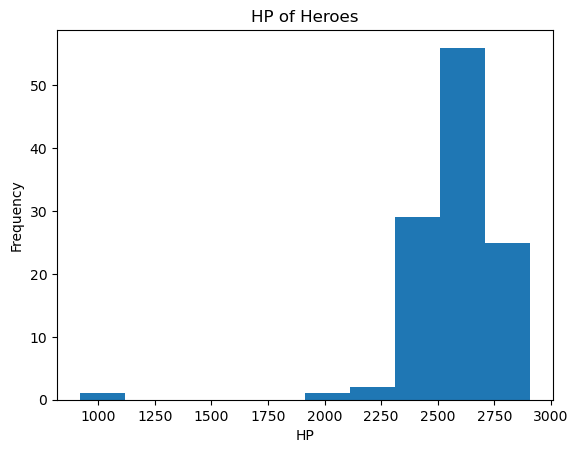

In [12]:
plt.hist(df['Hp'], bins=10)
plt.title("HP of Heroes")
plt.xlabel("HP")
plt.ylabel("Frequency")
plt.show()

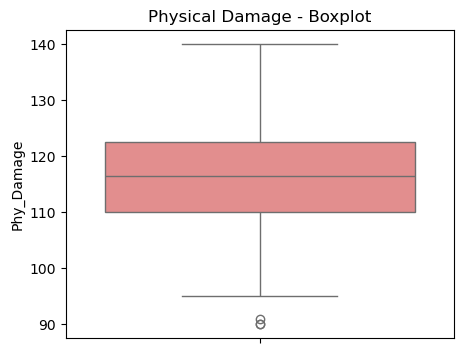

In [13]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Phy_Damage'], color='lightcoral')
plt.title("Physical Damage - Boxplot")
plt.show()

In [14]:
df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,None,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,None,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,None,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


In [15]:
numeric_cols = ['Hp','Hp_Regen','Mana','Mana_Regen','Phy_Damage','Mag_Damage','Phy_Defence','Mag_Defence','Mov_Speed']
X = df[numeric_cols]
y = df['Primary_Role']

In [16]:
df.Primary_Role.value_counts()

Primary_Role
Fighter     33
Mage        25
Marksman    18
Tank        16
Assassin    13
Support      9
Name: count, dtype: int64

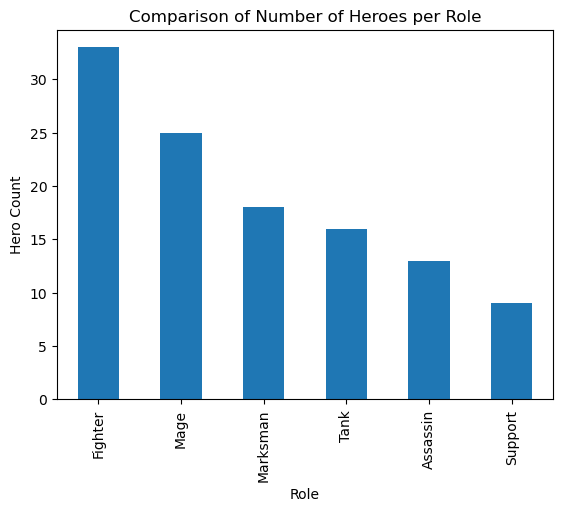

In [17]:
df["Primary_Role"].value_counts().plot(kind="bar")
plt.title("Comparison of Number of Heroes per Role")
plt.xlabel("Role")
plt.ylabel("Hero Count")
plt.show()

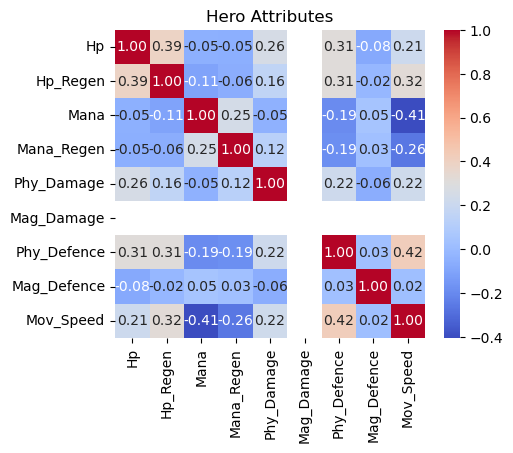

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Hero Attributes")
plt.show()

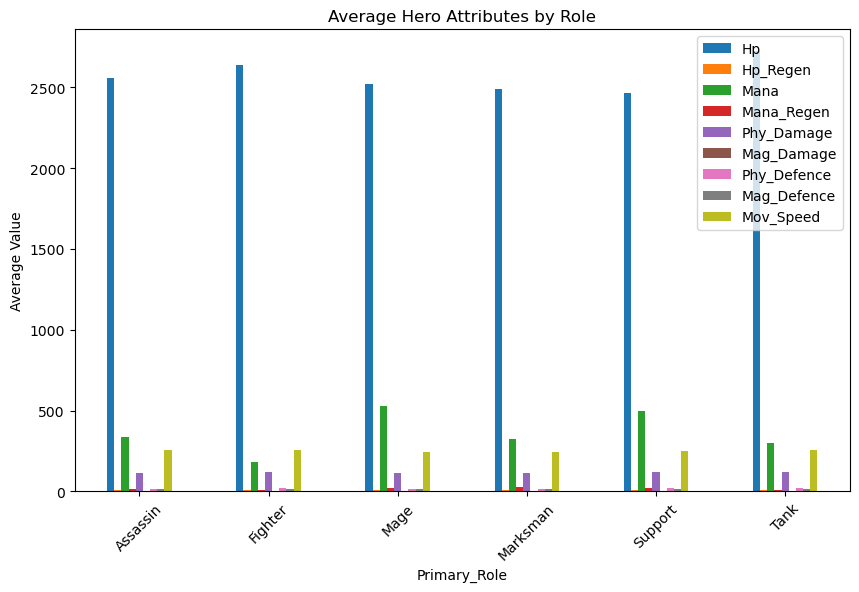

In [19]:
role_means = df.groupby("Primary_Role")[numeric_cols].mean()
role_means.plot(kind="bar", figsize=(10,6))
plt.title("Average Hero Attributes by Role")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()

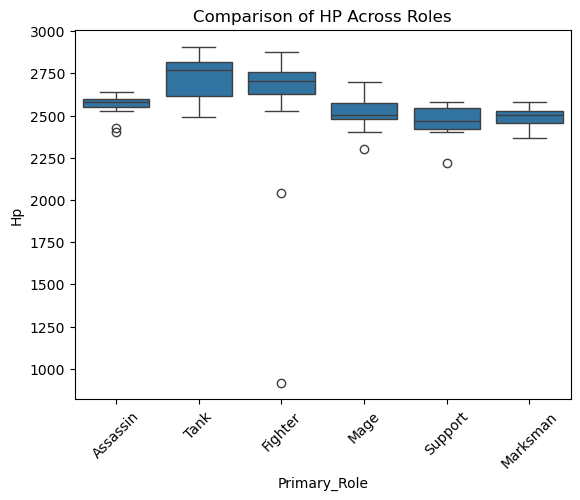

In [20]:
plt.figure()
sns.boxplot(x="Primary_Role", y="Hp", data=df)
plt.title("Comparison of HP Across Roles")
plt.xticks(rotation=45)
plt.show()

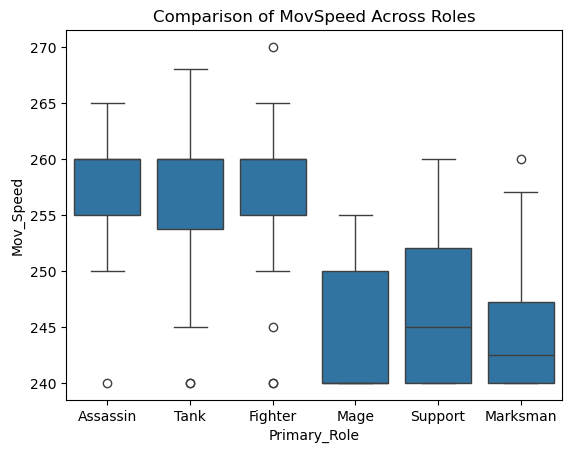

In [21]:
plt.figure()
sns.boxplot(x="Primary_Role", y="Mov_Speed", data=df)
plt.title("Comparison of MovSpeed Across Roles")
plt.show()

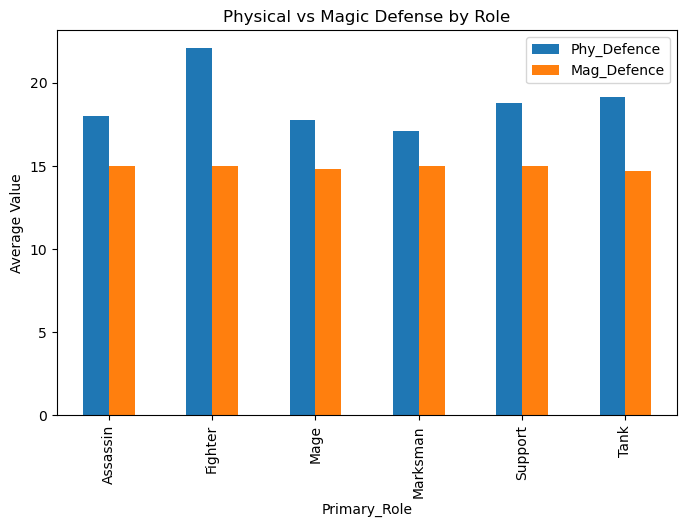

In [22]:
def_compare = df.groupby("Primary_Role")[["Phy_Defence", "Mag_Defence"]].mean()
def_compare.plot(kind="bar", figsize=(8,5))
plt.title("Physical vs Magic Defense by Role")
plt.ylabel("Average Value")
plt.show()

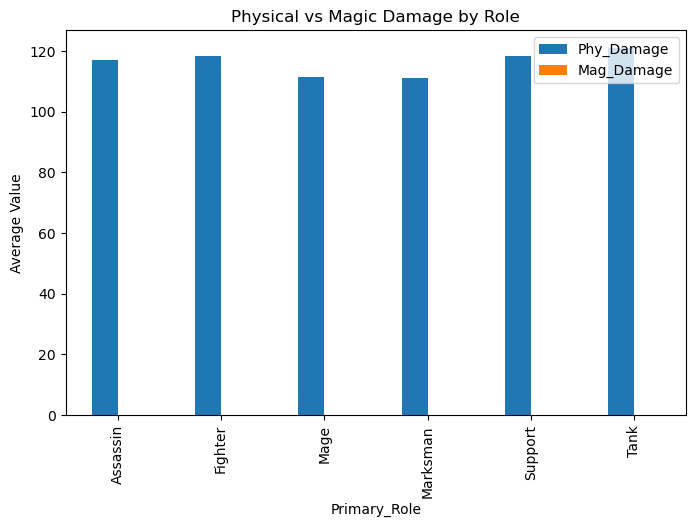

In [23]:
attack_compare = df.groupby("Primary_Role")[["Phy_Damage", "Mag_Damage"]].mean()
attack_compare.plot(kind="bar", figsize=(8,5))
plt.title("Physical vs Magic Damage by Role")
plt.ylabel("Average Value")
plt.show()

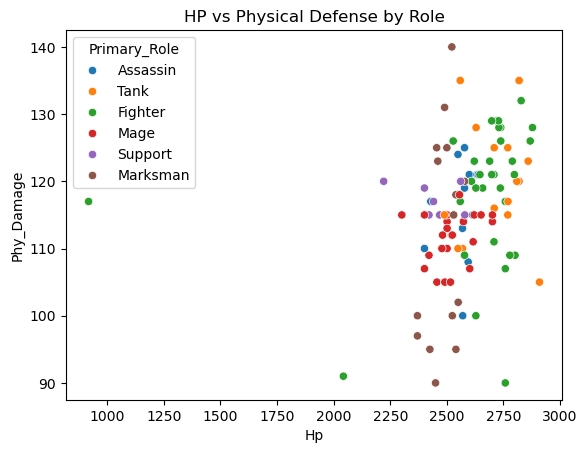

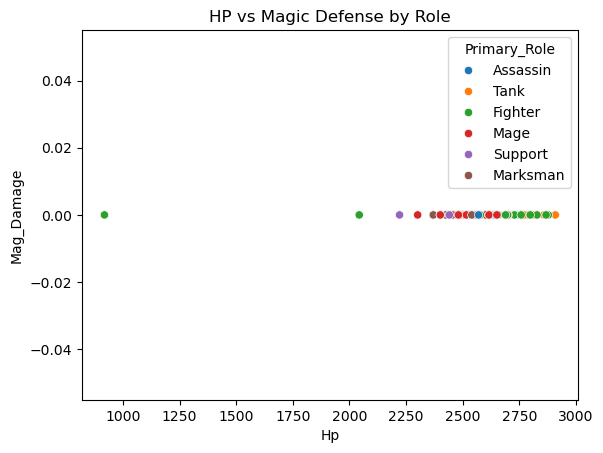

In [24]:
plt.figure()
sns.scatterplot(x="Hp", y="Phy_Damage", hue="Primary_Role", data=df)
plt.title("HP vs Physical Defense by Role")
plt.show()

plt.figure()
sns.scatterplot(x="Hp", y="Mag_Damage", hue="Primary_Role", data=df)
plt.title("HP vs Magic Defense by Role")
plt.show()

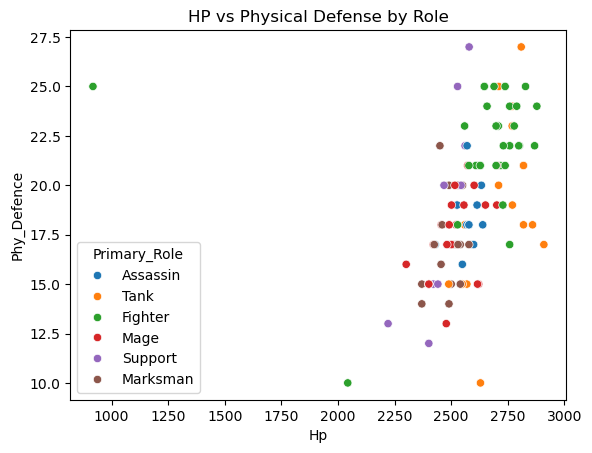

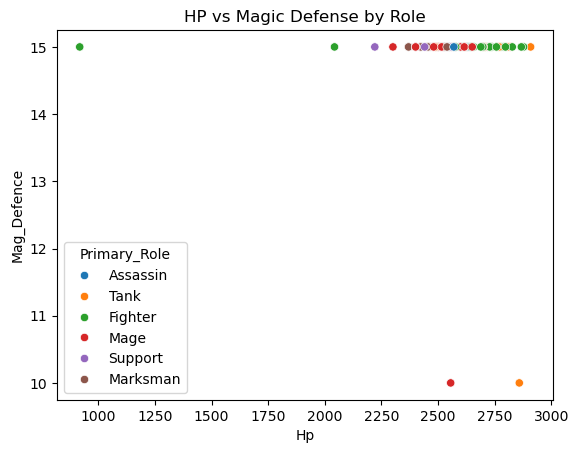

In [25]:
plt.figure()
sns.scatterplot(x="Hp", y="Phy_Defence", hue="Primary_Role", data=df)
plt.title("HP vs Physical Defense by Role")
plt.show()

plt.figure()
sns.scatterplot(x="Hp", y="Mag_Defence", hue="Primary_Role", data=df)
plt.title("HP vs Magic Defense by Role")
plt.show()

In [26]:
X.shape

(114, 9)

In [27]:
y

0      Assassin
1          Tank
2       Fighter
3          Mage
4       Fighter
         ...   
109    Assassin
110     Fighter
111        Mage
112        Mage
113     Fighter
Name: Primary_Role, Length: 114, dtype: object

In [28]:
le_role = LabelEncoder()
y_encoded = le_role.fit_transform(y)
# ai

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train.head(1)

,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed
33,2524,7.6,468,16.0,112,0,19,15,250


In [32]:
X_train_scaled[0] 

array([-0.44192912, -0.06218424,  0.5690427 , -0.00095261, -0.45421376,
        0.        , -0.05374101,  0.1132277 , -0.13300925])

In [33]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [34]:
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", acc)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))
# ai

Accuracy: 0.8285714285714286
F1 Score: 0.8189786059351277
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.75      0.82      0.78        11
           2       1.00      1.00      1.00         7
           3       0.86      0.86      0.86         7
           4       1.00      1.00      1.00         1
           5       0.67      0.40      0.50         5

    accuracy                           0.83        35
   macro avg       0.85      0.85      0.84        35
weighted avg       0.82      0.83      0.82        35



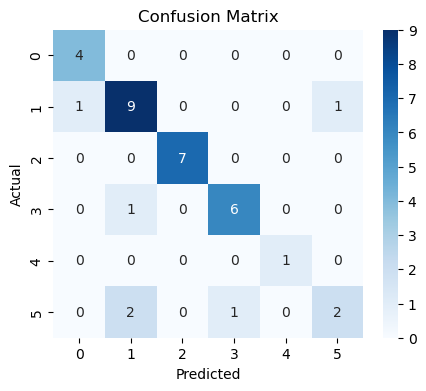

In [35]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ai

In [36]:
df['Primary_Role'].value_counts()

Primary_Role
Fighter     33
Mage        25
Marksman    18
Tank        16
Assassin    13
Support      9
Name: count, dtype: int64

In [37]:
joblib.dump(le_role, "hero_encoder.pkl") # ai
joblib.dump(model, "mlbb_hero_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [38]:
# ! pip install gradio

In [39]:
print(df['Hp'].min())
print(df['Hp_Regen'].min())
print(df['Mana'].min())
print(df['Mana_Regen'].min())
print(df['Phy_Damage'].min())
print(df['Mag_Damage'].min())
print(df['Phy_Defence'].min())
print(df['Mag_Defence'].min())
print(df['Mov_Speed'].min())

918
3.8
0
0.0
90
0
10
10
240


In [40]:
print(df['Hp'].max())
print(df['Hp_Regen'].max())
print(df['Mana'].max())
print(df['Mana_Regen'].max())
print(df['Phy_Damage'].max())
print(df['Mag_Damage'].max())
print(df['Phy_Defence'].max())
print(df['Mag_Defence'].max())
print(df['Mov_Speed'].max())

2909
18.4
750
240.0
140
0
27
15
270


In [41]:
import gradio as gr
import numpy as np
import joblib

model = joblib.load("mlbb_hero_model.pkl")
scaler = joblib.load("scaler.pkl")
le_role = joblib.load("hero_encoder.pkl") # ai

def predict_primary_role(Hp, Hp_Regen, Mana, Mana_Regen,Phy_Damage, Mag_Damage, Phy_Defence,Mag_Defence, Mov_Speed):
    user_input = np.array([[ Hp, Hp_Regen, Mana, Mana_Regen,Phy_Damage, Mag_Damage,Phy_Defence, Mag_Defence, Mov_Speed]])
    user_input_scaled = scaler.transform(user_input)
    role_encoded = model.predict(user_input_scaled)
    role_name = le_role.inverse_transform(role_encoded)[0] #ai

    return f"Your suitable primary role: {role_name}"

app = gr.Interface(
    fn=predict_primary_role,
    inputs=[
        gr.Slider(918, 2909, step=1, label="HP"),
        gr.Slider(3.8, 18.4, step=0.1, label="HP Regen"),
        gr.Slider(0, 750, step=1, label="Mana"),
        gr.Slider(0, 31, step=1, label="Mana Regen"),
        gr.Slider(90, 140, step=1, label="Physical Damage"),
        gr.Slider(0, 150, step=1, label="Magic Damage"),
        gr.Slider(10, 27, step=1, label="Physical Defence"),
        gr.Slider(10, 25, step=1, label="Magic Defence"),
        gr.Slider(240, 270, step=1, label="Movement Speed"),
    ],
    outputs=gr.Textbox(
        label="Your role"),
        title="Choose your suitable role for mlbb"
)

app.launch(share=True)


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://4b397383a49404cbad.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [42]:
df.columns

Index(['Name', 'Title', 'Voice_Line', 'Release_Date', 'Primary_Role',
       'Secondary_Role', 'Lane', 'Hp', 'Hp_Regen', 'Mana', 'Mana_Regen',
       'Phy_Damage', 'Mag_Damage', 'Phy_Defence', 'Mag_Defence', 'Mov_Speed',
       'Esport_Wins', 'Esport_Loss'],
      dtype='object')

In [43]:
df.head()

,Name,Title,Voice_Line,Release_Date,Primary_Role,Secondary_Role,Lane,Hp,Hp_Regen,Mana,Mana_Regen,Phy_Damage,Mag_Damage,Phy_Defence,Mag_Defence,Mov_Speed,Esport_Wins,Esport_Loss
0,Aamon,Duke of Shards,"It is better to be feared than loved, if you c...",2021-10-25,Assassin,None,Jungler,2614,8.0,455,21.0,115,0,19,15,250,43,42
1,Akai,Panda Warrior,Now Akai enters the scene!,2016,Tank,Support,Roamer,2769,8.4,422,12.0,115,0,24,15,260,540,524
2,Aldous,Soul Contractor,Primary Role,2018,Fighter,None,EXP Lane,2718,9.8,405,18.0,129,0,21,15,260,95,92
3,Alice,Queen of Blood,Watch your back!,2016,Mage,Tank,EXP Lane,2573,7.2,493,18.0,114,0,21,15,240,364,352
4,Alpha,Blade of Enmity,Test! Alpha is online.,2017,Fighter,None,EXP Lane,2646,7.8,453,31.0,121,0,25,15,260,24,33


In [44]:
df['Name'].value_counts()

Name
Aamon         1
Nana          1
Miya          1
Minsitthar    1
Minotaur      1
             ..
Fanny         1
Eudora        1
Estes         1
Edith         1
Zilong        1
Name: count, Length: 114, dtype: int64

In [45]:
df.Primary_Role.value_counts()

Primary_Role
Fighter     33
Mage        25
Marksman    18
Tank        16
Assassin    13
Support      9
Name: count, dtype: int64